# 1. Descripción del Análisis Exploratorio de Datos (EDA)

El hundimiento del RMS Titanic en 1912 es uno de los acontecimientos más trágicos y conocidos de la historia marítima. Esta catástrofe se cobró la vida de muchas personas y sus circunstancias han suscitado un interés constante por comprender los factores que contribuyeron a la supervivencia de los pasajeros. El conjunto de datos del Titanic proporciona una valiosa ventana a este trágico suceso, ya que ofrece información detallada sobre los pasajeros que iban a bordo y sobre si sobrevivieron o no.

El análisis exploratorio de datos (EDA) es una herramienta fundamental para explorar y comprender conjuntos de datos, ya que nos permite descubrir patrones, tendencias y relaciones significativas. En este estudio, nos embarcamos en un EDA del conjunto de datos del Titanic con el objetivo de arrojar luz sobre los factores que pueden haber influido en la supervivencia de los pasajeros.

Este conjunto de datos contiene diversas variables que describen las características de los pasajeros, como su sexo, edad, clase socioeconómica, puerto de embarque, etcétera. Algunas de las preguntas a las que intentaremos dar respuesta son ¿Existe una relación entre la clase de un pasajero y su probabilidad de supervivencia? ¿Desempeñaron la edad o el sexo un papel significativo en la probabilidad de supervivencia? ¿Existen diferencias significativas en las tasas de supervivencia entre los pasajeros embarcados en distintos puertos?

Mediante el análisis de estas y otras variables, pretendemos extraer datos significativos que nos ayuden a comprender mejor los acontecimientos que rodearon el hundimiento del Titanic. Este análisis no sólo nos permite honrar la memoria de los que iban a bordo, sino que también nos proporciona valiosas lecciones sobre la resistencia humana y los factores que pueden influir en los resultados en situaciones extremas.

En las siguientes secciones exploraremos en detalle las distintas variables del conjunto de datos, crearemos visualizaciones para identificar patrones y relaciones, y aplicaremos técnicas estadísticas para extraer conclusiones significativas. A través de este proceso, esperamos obtener una perspectiva más clara y completa de los acontecimientos que rodearon al Titanic y de las vidas de quienes iban a bordo.

![Texto alternativo](../images/titanic_image.png)


# 2. ¿Cuál es la pregunta que vamos a responder?

¿Qué factores están relacionados con que los pasajeros tuvieran una alta/baja probilidad de sobrevivir?

# 3. Idea General de nuestro DataSet

En primer lugar importaremos las librerías necesarias:

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick 
import warnings
warnings.filterwarnings("ignore")

Después tendremos que generar nuestro **DataFrame** a partir del archivo **CSV**, y ejecutaremos el **head(10)** para hacernos una primera idea de la apariencia de nuestros datos. Al realizar el **'pd.read_csv()'** utilizaremos la variable **'index_col=0'** para establecer el **PassengerId** como el índice de nuestro dataset. 

In [2]:
# Cargar el DataFrame de los datos del Titanic desde la URL
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col=0)

# Mostrar las primeras 10 rows del DataFrame
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Nuestro DataFrame cuenta con unas dimensiones de **891 filas** x **11 columnas**. Las **891 filas** son el número de pasajeros con los que contamos (entradas), esta es una cantidad suficiente para hacer un análisis de datos exhaustivo. Las **11 columnas** representan las variables o caracterísitcas que tenemos de cada pasajero (features).

In [3]:
# Obtener las dimensiones del DataFrame
titanic.shape

(891, 11)

Aquí podemos observar cuales son nuestras **columnas** en una lista.

In [4]:
# Obtener los nombres de las columnas del DataFrame
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

El siguiente método nos permite sacar **información general** de nuestro dataset, esto es muy útil y podemos ver como hay una serie de información que utilizaremos más adelante en este análisis.

In [5]:
# Obtener un resumen del DataFrame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Pasemos a definir nuestros datos, tanto el **significado**, como la **categorización** o los **tipos de datos**.

# 4. Definiendo los Datos

En este apartado nos encargaremos de definir los datos tanto el **significado**, como la **categorización** o los **tipos de datos**. Esto es realmente útil para tener una idea general del comportamiento de nuestros datos, y además nos servirá para crear distintos tipos de gráficos dependiendo de su categorización. 

## 4.1 Descripción de las Variables

En primer lugar veremos el significado de cada variable:
- **PassengerId**: ID único de cada pasajero
- **Survived**: Pasajero superviviente (1) o muerto (0)
- **Pclass**: Clase del pasajero
- **Name**: Nombre
- **Sex**: Género del Pasajero
- **Age**: Edad
- **SibSp**: Número de parejas o hermanos
- **Parch**: Número de padres e hijos
- **Ticket**: Número de Ticket
- **Fare**: Dinero Gastado en el Ticket
- **Cabin**: Categoría de la Cabina
- **Embarked**: Puerto desde el que embarcó cada pasajero (C = Cherbourg, Q = Queenstown, S = Southampton)

## 4.2 Clasificación de Variables

Después veremos la clasificación de estas variables, es decir si son numéricas o categóricas, y dentro de esto si son discretos o continuos, o nominales, binarios u ordinales respectivamente:
- Variables Categóricas
    - Variables Nominales: **Sex, Embarked, Cabin, Name and Ticket.**
    - Variables Binarias: **Survived.**
    - Variables Ordinales: **Pclass, SibSp and Parch.**
- Variables Numéricas
    - Variables Discretas: **Age.**
    - Variables Continuas: **Fare.**

## 4.3 Tipos de Datos

En este apartado podemos ver los tipos de datos de las variables de cada columna:

In [6]:
# Obtener los tipos de datos de cada columna del DataFrame
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

- float64(2): Fare y Age
- int64(5): Pclass, Sibsp, Parch, PassengerId y Survived
- object(5): Cabin, Embarked, Ticket, Name y Sex

# 5. Datos Faltantes

En el análisis exploratorio de datos, uno de los aspectos fundamentales que se deben abordar es la presencia de valores faltantes en el conjunto de datos. Los valores faltantes pueden surgir por diversas razones, como errores en la recolección de datos, problemas de almacenamiento, o simplemente porque ciertas observaciones no están disponibles o no son aplicables. La importancia de identificar, analizar y tratar los valores faltantes radica en su potencial impacto sobre la calidad y la fiabilidad de los resultados del análisis.

Los valores faltantes pueden distorsionar las conclusiones derivadas de los datos si no se manejan adecuadamente. Pueden llevar a sesgos en los modelos predictivos, afectar las estadísticas descriptivas y, en general, comprometer la integridad del análisis. Por estas razones, es crucial dedicar un apartado específico en el EDA para abordar los valores faltantes, permitiendo una comprensión clara de su magnitud, distribución y posibles causas.

Este apartado no solo se centrará en la detección de los valores faltantes, sino también en la aplicación de técnicas para manejarlos de manera efectiva, ya sea mediante imputación, eliminación o el uso de métodos más avanzados. La correcta gestión de los valores faltantes es un paso esencial para garantizar que el análisis posterior sea preciso y representativo de la realidad, evitando así decisiones basadas en información incompleta o sesgada.

En primer lugar veremos que columnas tienen valores **nulos** en nuestro dataset. Como podemos observar tenemos **3 columnas** con al menos un valor nulo.

In [7]:
titanic.columns[titanic.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

A continuación, tenemos que visualizar cuantos valores nulos existen por columna, en nuestro caso tenemos **177 nulos** en la columna **Age**, **687 nulos** en la columna **Cabin** y **2 nulos** en la columna **Embarked**.

In [8]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Teniendo en cuenta esto veremos como podemos tratar estos valores nulos.

## 5.1. Age

Como vimos anteriormente esta variable es la que indica la **edad de los pasajeros** y tiene un **19,86%** de valores faltantes. Por ello he tomado la decisión de **imputar** estos valores computando números aleatorios, una **desviación estándar** separado de la **media** por arriba y por abajo, y con el tamaño de los **nulos** que tenemos. 

Esto nos permite que se repartan esta cantidad de valores faltantes de una manera más equitativa, ya que los valores estan entorno a la media. Considero que esta aplicación le da un punto más realista a nuestros datos, ya que si imputasemos la media se vería la distribución de estos datos sería más desproporcianada, debido a la cantidad significativa de datos en el valor de la media.

In [9]:
# Calcula la media de la columna "Age" del DataFrame titanic
mean = titanic["Age"].mean()

# Calcula la desviación estándar de la columna "Age" del DataFrame titanic
std = titanic["Age"].std()

# Cuenta el número de valores nulos en la columna "Age"
is_null = titanic["Age"].isnull().sum()

# Genera una serie de edades aleatorias dentro del rango (mean - std, mean + std)
# La cantidad de valores generados es igual al número de valores nulos en "Age"
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# Crea una copia de la columna "Age" para trabajar sobre ella
age_slice = titanic["Age"].copy()

# Reemplaza los valores nulos en la copia de "Age" con las edades aleatorias generadas
age_slice[np.isnan(age_slice)] = rand_age

# Asigna la copia modificada de "Age" de vuelta al DataFrame titanic
titanic["Age"] = age_slice

# Convierte los valores de la columna "Age" a enteros
titanic["Age"] = titanic["Age"].astype(int)

# Verifica y cuenta el número de valores nulos restantes en la columna "Age"
titanic['Age'].isnull().sum()


0

Como podemos ver ya no tenemos valores nulos en esta columna.

## 5.2. Cabin

Esta variable indica la **categoría de la cabina**, y tiene un **77,1%** de valores faltantes. Por ello he tomado la decisión de **eliminar** esta columna completa. Ya que aunque podría llegar a contener alguna información relevante que nos pueda ayudar a resolver nuestra pregunta inicial, la cantidad de nulos es tan masiva que resultaría impreciso imputar ningún valor.

In [10]:
# Elimina la columna 'Cabin' del DataFrame titanic
titanic = titanic.drop('Cabin', axis=1)

# Muestra las columnas restantes del DataFrame titanic
titanic.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

## 5.3. Embarked

La variable que trataremos en este apartado se trata de **donde embarcó el pasajero**, esta solo cuenta con **2** valores faltantes. Lo que he decidido hacer con esta variable es completarla con el valor **más común**, es decir con la **moda**.

In [11]:
# Calcula el valor más frecuente (moda) de la columna 'Embarked'
mode_embarked = titanic['Embarked'].mode()[0]

# Rellena los valores nulos en la columna 'Embarked' con la moda calculada
titanic['Embarked'] = titanic['Embarked'].fillna(mode_embarked)

# Verifica y cuenta el número de valores nulos restantes en la columna 'Embarked'
titanic['Embarked'].isnull().sum()

0

# 6. Comprensión de los Datos

En el análisis exploratorio de datos (EDA), una comprensión exhaustiva de las variables presentes en el conjunto de datos es fundamental para orientar adecuadamente los análisis posteriores. Este apartado está diseñado para ofrecer una descripción detallada de cada una de las variables en nuestro DataFrame, diferenciando claramente entre variables categóricas y variables numéricas.

Las variables categóricas representan datos que pueden clasificarse en un número finito de categorías o grupos. Ejemplos comunes incluyen variables como género, estado civil, o tipo de producto. Para cada variable categórica en nuestro DataFrame, proporcionaremos un esquema que ilustre el conteo de cada opción o categoría. Este esquema se presenta típicamente mediante gráficos de barras o diagramas de pastel, que son herramientas efectivas para visualizar distribuciones de frecuencia y comparar el tamaño de diferentes categorías de manera clara y directa.

Las variables numéricas, por otro lado, representan datos cuantitativos que pueden asumir un rango amplio de valores, como la edad, el salario, o la temperatura. Para estas variables, utilizaremos histogramas que permitan visualizar la distribución de los datos a lo largo de su rango de valores. Los histogramas son particularmente útiles para identificar patrones como la normalidad, la presencia de sesgos, y la existencia de outliers (valores atípicos), proporcionando una visión profunda sobre la dispersión y la concentración de los datos.

El uso de gráficos distintos para variables categóricas y numéricas se justifica por la naturaleza intrínseca de los datos que representan. Las variables categóricas, al estar compuestas de grupos discretos y finitos, se visualizan mejor con gráficos que destaquen el conteo de cada categoría, permitiendo comparaciones visuales fáciles y directas. En contraste, las variables numéricas, que pueden tomar una amplia gama de valores continuos, se representan mejor con histogramas que muestran la distribución y densidad de los datos, facilitando el análisis de su comportamiento y características estadíticas.

## 6.1 Variables Categóricas

### 6.1.1 Survived

Esta es nuestra variable objetivo, con el siguiente gráfico podremos ver la cantidad de supervivientes en comparación con los que no. Esto es una idea general de la variable, más adelante veremos comparaciones de esta variable con el resto. Recordemos que la pregunta que ibamos a resolver era, ¿Qué factores están relacionados con que los pasajeros tuvieran una alta/baja probilidad de sobrevivir?

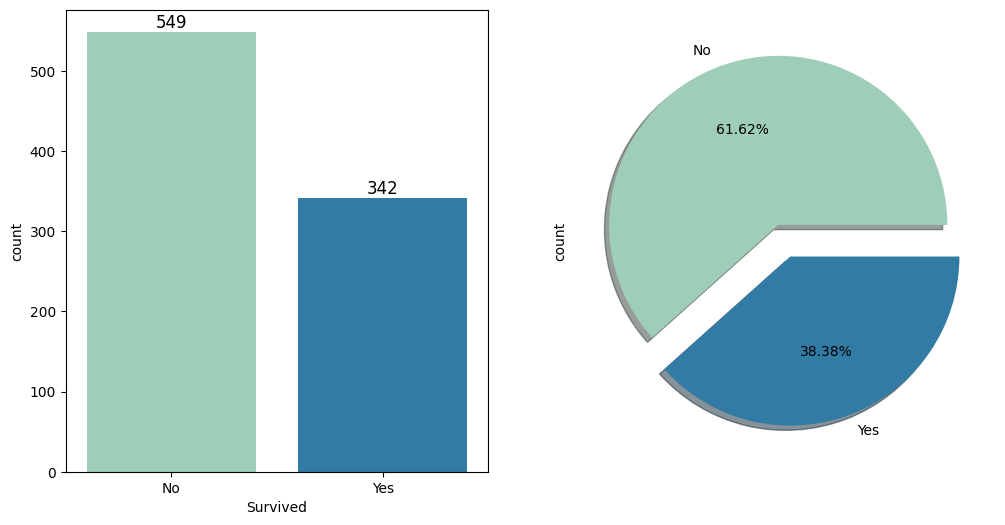

In [12]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'Survived' del DataFrame titanic
sns.countplot(x='Survived', data=titanic, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")
# Cambia las etiquetas del eje x a "No" y "Yes" para una mejor comprensión
ax1.set_xticklabels(["No", "Yes"])

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'Survived'
titanic['Survived'].value_counts().plot.pie(
    explode=[0.1, 0.1],             # Separa ligeramente ambas secciones del gráfico
    autopct='%1.2f%%',              # Muestra los porcentajes con dos decimales
    labels=["No", "Yes"],           # Etiquetas para las secciones del gráfico
    shadow=True,                    # Añade una sombra al gráfico
    colors=["#9FCEB8", "#327BA5"],  # Colores personalizados para las secciones
    ax=ax2                          # Especifica el eje (subplot) donde se dibujará el gráfico
)

# Muestra los gráficos
plt.show()

### 6.1.2 Sex

Esta es la variable que indica la cantidad de **hombres y mujeres** que habían en el Titanic. Como podemos observar existían más hombres que mujeres en el barco, pero esto no significa que sobrevivieran o no, eso lo veremos más adelante comparandolo con la variable **"Survived"**. En este análisis resolveremos la siguiente cuestión, ¿Sobrevivieron más hombres o más mujeres a este accidente? ¿Existe alguna justificación en caso de que un sexo tuviera más fallecidos que el otro?

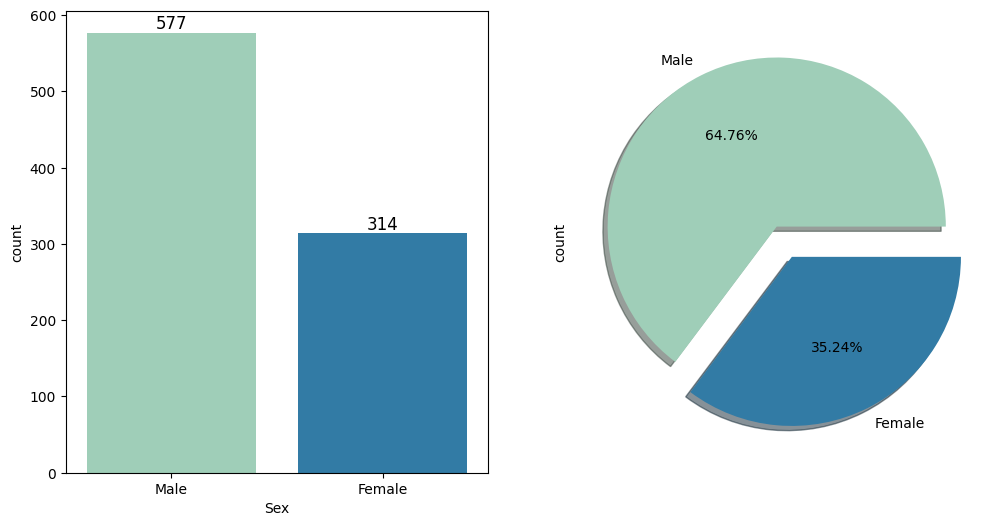

In [13]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'Sex' del DataFrame titanic
sns.countplot(x='Sex', data=titanic, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")
# Cambia las etiquetas del eje x a "Male" y "Female" para una mejor comprensión
ax1.set_xticklabels(["Male", "Female"])

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'Sex'
titanic['Sex'].value_counts().plot.pie(
    explode=[0.1, 0.1],             # Separa ligeramente ambas secciones del gráfico
    autopct='%1.2f%%',              # Muestra los porcentajes con dos decimales
    labels=["Male", "Female"],      # Etiquetas para las secciones del gráfico
    shadow=True,                    # Añade una sombra al gráfico
    colors=["#9FCEB8", "#327BA5"],  # Colores personalizados para las secciones
    ax=ax2                          # Especifica el eje (subplot) donde se dibujará el gráfico
)

# Muestra los gráficos
plt.show()


### 6.1.3 Name - Title

En este caso lo que he decidido es tomar del nombre algo que nos pueda interesar. En este caso al separar el Mr., Mrs. ..., podemos separar a los pasajeros según su estatus social. De esta manera podemos relacionar el sobrevivir o no dependiendo del status social del pasajero. Entonces la pregunta que nos hariamos sería, ¿Influyo el status social en que sobreviviera o no el pasajero?

In [14]:
# Extrae la columna 'Name' del DataFrame titanic y la almacena en la variable 'name'
name = titanic["Name"]

# Crea una nueva columna 'Title' en el DataFrame titanic
# Extrae el título de cada nombre en la columna 'Name'
# Para cada nombre, divide la cadena por "," y toma la segunda parte, luego divide esa parte por "." y toma la primera parte
# Finalmente, elimina cualquier espacio en blanco alrededor del título extraído
titanic["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

# Muestra los primeros 10 valores de la nueva columna 'Title' para verificar los títulos extraídos
titanic["Title"].head(10)

# Cuenta y muestra la cantidad de ocurrencias de cada título en la columna 'Title'
titanic["Title"].value_counts()

# Finalmente eliminamos la columna Name que ya no necesitamos
titanic = titanic.drop('Name', axis=1)

Visto lo anterior podemos crear un countplot() para ver cuantos pasajeros había según su clase social. Esto nos ayudará posteriormente comparandolo con otras variables a determinar si es una característica relevante o no.

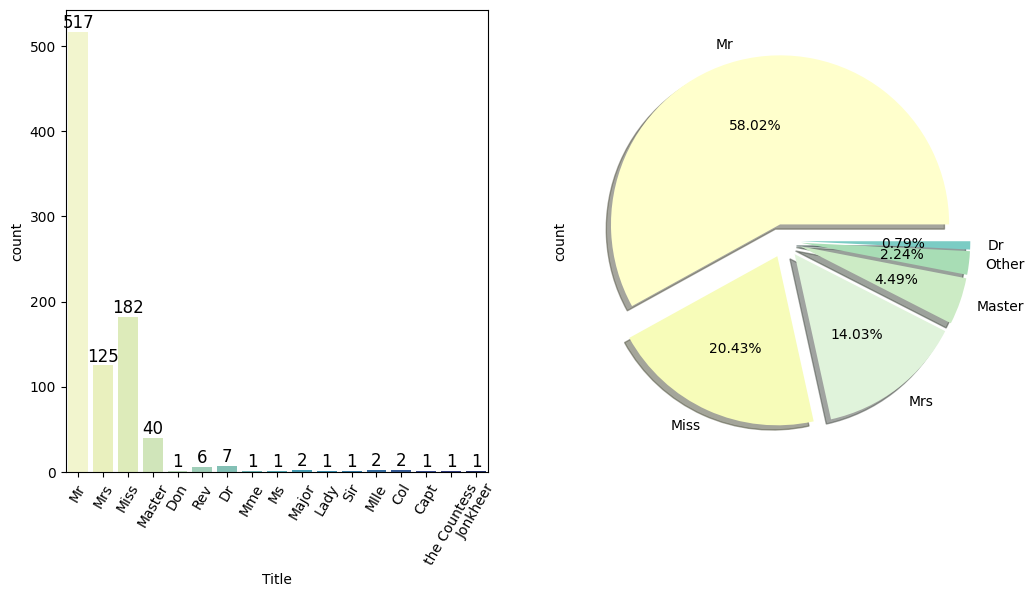

In [15]:
# Define un umbral para agrupar los títulos poco frecuentes
threshold = 6

# Crea una nueva columna 'Title_Grouped' en el DataFrame titanic
# Si la frecuencia de un título es mayor que el umbral, se mantiene el título original
# De lo contrario, se agrupa bajo el título 'Other'
titanic['Title_Grouped'] = titanic['Title'].apply(lambda x: x if titanic['Title'].value_counts()[x] > threshold else 'Other')

# Establece el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'Title' del DataFrame titanic
sns.countplot(x='Title', data=titanic, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")
# Rota las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=60)

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'Title_Grouped'
titanic['Title_Grouped'].value_counts().plot.pie(
    explode=[0.1] * titanic['Title_Grouped'].nunique(),  # Separa todas las secciones del gráfico
    autopct='%1.2f%%',                                   # Muestra los porcentajes con dos decimales
    colors=['#FFFFCC', '#F7FCB9', '#E0F3DB', '#CCEBC5', '#A8DDB5', '#7BCCC4', '#4EB3D3', '#2B8CBE'],  # Colores personalizados para las secciones
    shadow=True,                                         # Añade una sombra al gráfico
    ax=ax2                                               # Especifica el eje (subplot) donde se dibujará el gráfico
)
# Muestra los gráficos
plt.show()

In [16]:
# Eliminamos Title_grouped para que después el modelo no nos de problemas
titanic = titanic.drop('Title_Grouped', axis=1)

### 6.1.4 Ticket

La variable 'Ticket' terminará por eliminarse, debido a que no le encuentro una utilidad real que pueda ser beneficiosa para el modelo

In [17]:
titanic["Ticket"].head(5)

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

In [18]:
titanic = titanic.drop('Ticket', axis=1)

### 6.1.5 Pclass

Esta variable como vimos anteriormente determina la clase en la que se encontraban los pasajeros. Siendo la clase 1 la de más rango y la 3 la de menor rango. Como podemos ver la clase 3 era las más frecuente en el Titanic, después la 2 y la 1, respectivamente. Hemos realizado una gráfica para tener una primera idea de la cantidad de pasajeros que hay por clase. Teniendo esto en mente, ¿Existe alguna relación entre la clase del pasajero y su superviviencia?

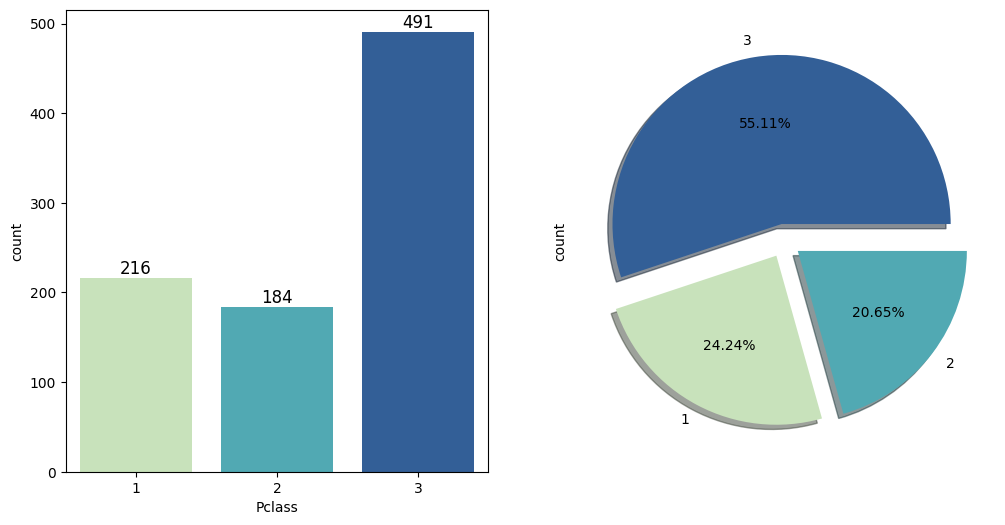

In [19]:
# Establecer el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 6))

# Crear el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibujar un gráfico de conteo para la columna 'Pclass' del DataFrame titanic
sns.countplot(x='Pclass', data=titanic, palette='YlGnBu', ax=ax1)
# Añadir etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crear el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibujar un gráfico circular de los valores de la columna 'Pclass'
titanic['Pclass'].value_counts().plot.pie(
    explode=[0.1, 0.1, 0.1],          # Separar ligeramente todas las secciones del gráfico
    autopct='%1.2f%%',                # Mostrar los porcentajes con dos decimales
    shadow=True,                      # Añadir una sombra al gráfico
    colors=["#335F97", "#C8E2BB", "#51A9B3"],  # Colores personalizados para las secciones
    ax=ax2                            # Especificar el eje (subplot) donde se dibujará el gráfico
)

# Mostrar los gráficos
plt.show()


### 6.1.6 SibSp & Parch

Las características SibSp y Pach, como vimos anteriormente, son el número de Hermanos/Esposos y el número de Padres/Hijos respectivamente. Esta variable considero que puede ser muy relevante, ya qué ¿Influyó en la superviviencia de los pasajeros que tuvieran o no Hermanos/Esposos/Padres/Hijos en el barco?

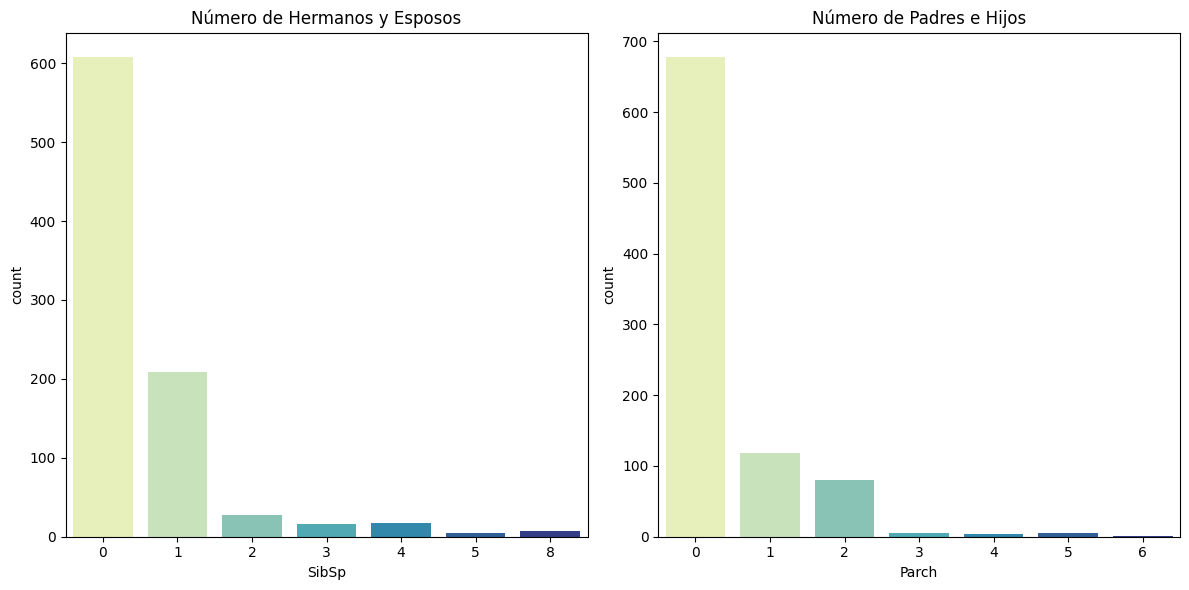

In [20]:
# Crear una figura y dos subplots (uno para 'SibSp' y otro para 'Parch')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Dibujar el gráfico de conteo para 'SibSp' en el primer subplot
sns.countplot(ax=axes[0], data=titanic, x='SibSp', palette='YlGnBu')
# Establecer el título del primer subplot
axes[0].set_title('Número de Hermanos y Esposos')

# Dibujar el gráfico de conteo para 'Parch' en el segundo subplot
sns.countplot(ax=axes[1], data=titanic, x='Parch', palette='YlGnBu')
# Establecer el título del segundo subplot
axes[1].set_title('Número de Padres e Hijos')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


La idea para que esta característica sea más manejable es unir 'SibSp' y 'Parch' en una misma variable llamada 'Family', de esta manera podemos ver cual era la dimensión de las familias dentro del barco, sumando el número de familiares al propio pasajero. ¿Es exactamente lo mismo Hermanos/Esposos que Padres/Hijos? Evidentemente no, pero por la misma razón que no es lo mismo Hermanos o Esposos, considero que es bastante lógico unirlo en una única característica haciéndonos entonces la siguiente pregunta ¿Cómo influyó la dimensión de las familias que había en el barco en que sobrevivieran o no al accidente?

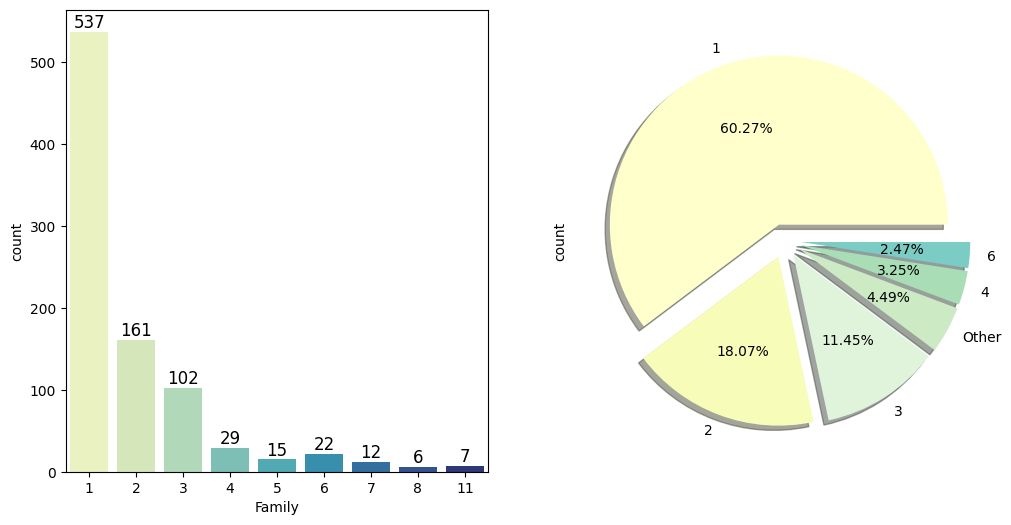

In [21]:
# Calcular el tamaño de la familia para cada pasajero
titanic["Family"] = titanic["SibSp"] + titanic["Parch"] + 1

# Definir un umbral para agrupar tamaños de familia poco frecuentes
threshold = 20

# Crear una nueva columna 'Family_grouped' para agrupar los tamaños de familia
titanic['Family_grouped'] = titanic['Family'].apply(lambda x: x if titanic['Family'].value_counts()[x] > threshold else 'Other')

# Configurar el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 6))

# Crear el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibujar un gráfico de conteo para el tamaño de la familia
sns.countplot(x='Family', data=titanic, palette='YlGnBu', ax=ax1)
# Añadir etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crear el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibujar un gráfico circular para el tamaño de la familia agrupada
titanic['Family_grouped'].value_counts().plot.pie(
    explode=[0.1] * titanic['Family_grouped'].nunique(),  # Separar todas las secciones del gráfico
    autopct='%1.2f%%',  # Mostrar los porcentajes con dos decimales
    shadow=True,  # Añadir una sombra al gráfico
    colors=['#FFFFCC', '#F7FCB9', '#E0F3DB', '#CCEBC5', '#A8DDB5', '#7BCCC4', '#4EB3D3', '#2B8CBE', '#08589E', '#0868AC', '#2B8CBE'],  # Colores personalizados para las secciones
    ax=ax2  # Especificar el eje (subplot) donde se dibujará el gráfico
)

# Mostrar los gráficos
plt.show()

Como podemos observar esta variable define cual es era el tamaño de las familias que habían en el barco. Esto puede resultar útil, pero igualmente mantendremos las características 'SibSp' y 'Parch'.

In [22]:
# Eliminamos Family_grouped para que después el modelo no nos de problemas
titanic = titanic.drop('Family_grouped', axis=1)

### 6.1.7 Embarked

Como vimos anteriormente esta variable se refiere al lugar de embarcación de cada pasajero. Podemos ver que el más frecuente es el de Southampton, el cual usamos también para imputar los 2 valores nulos que imputamos en el apartado anterior. 

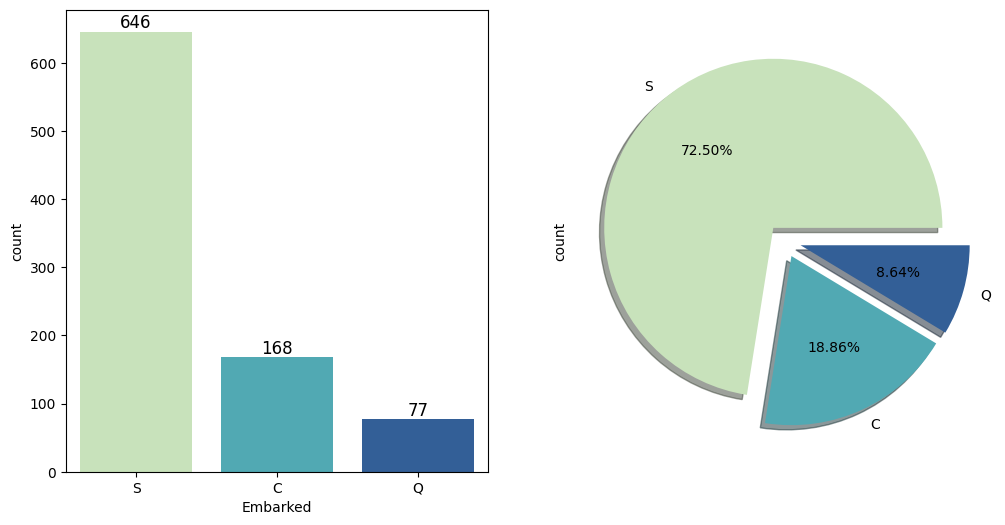

In [23]:
# Configurar el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 6))

# Crear el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibujar un gráfico de conteo para el puerto de embarque ('Embarked')
sns.countplot(x='Embarked', data=titanic, palette='YlGnBu', ax=ax1)
# Añadir etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crear el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibujar un gráfico circular de los valores del puerto de embarque ('Embarked')
titanic['Embarked'].value_counts().plot.pie(
    explode=[0.1, 0.1, 0.1],  # Separar ligeramente todas las secciones del gráfico
    autopct='%1.2f%%',        # Mostrar los porcentajes con dos decimales
    shadow=True,              # Añadir una sombra al gráfico
    colors=["#C8E2BB",  "#51A9B3", "#335F97"],  # Colores personalizados para las secciones
    ax=ax2                    # Especificar el eje (subplot) donde se dibujará el gráfico
)

# Mostrar los gráficos
plt.show()


## 6.2 Variables Numéricas

### 6.2.1 Fare

Esta variable, como vimos anteriormente, indica el precio del boleto pagado por el pasajero. El gráfico muestra la distribución de las tarifas pagadas, lo que puede ser útil para comprender la variabilidad en los precios de los boletos. La pregunta que nos podemos hacer es ¿Significa esto qué los pasajeros que pagaron un ticket más alto tuvieron más posibilidades de sobrevivir?

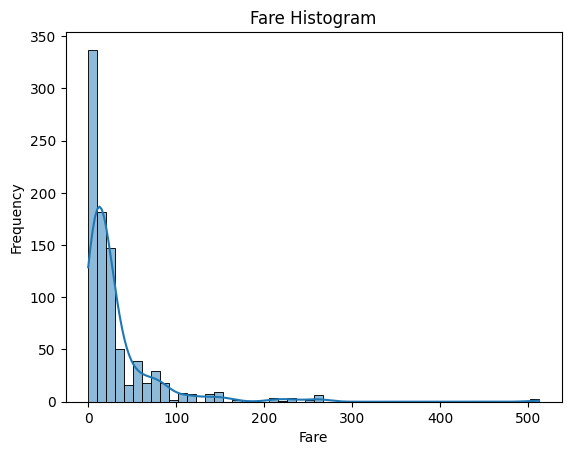

In [24]:
# Crear el histograma de la tarifa ('Fare')
g2 = sns.histplot(titanic['Fare'], kde=True, bins=50)

# Establecer la etiqueta del eje y
g2.set_ylabel("Frequency")

# Establecer el título del histograma
g2.set_title('Fare Histogram')

# Mostrar el histograma
plt.show()

### 6.2.2 Age

Como ya vimos esta variable representa la edad de cada pasajero. El gráfico muestra la distribución de edades, lo que nos permite entender la demografía de los pasajeros, incluidos niños, adultos y personas mayores. La pregunta que nos podemos hacer es ¿Influyó la edad de los pasajeros a que sobrevivieran o no a esta tragedia?

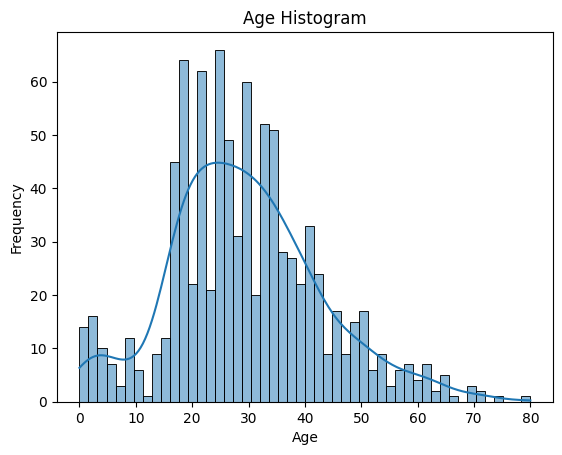

In [25]:
# Crear el histograma de la edad ('Age')
g2 = sns.histplot(titanic['Age'], kde=True, bins=50)

# Establecer la etiqueta del eje y
g2.set_ylabel("Frequency")

# Establecer el título del histograma
g2.set_title('Age Histogram')

# Mostrar el histograma
plt.show()


## 6.3 Comparación de cada variable

### 6.3.2 Correlación entre las variables y la variable objetivo (Survived)

#### Family

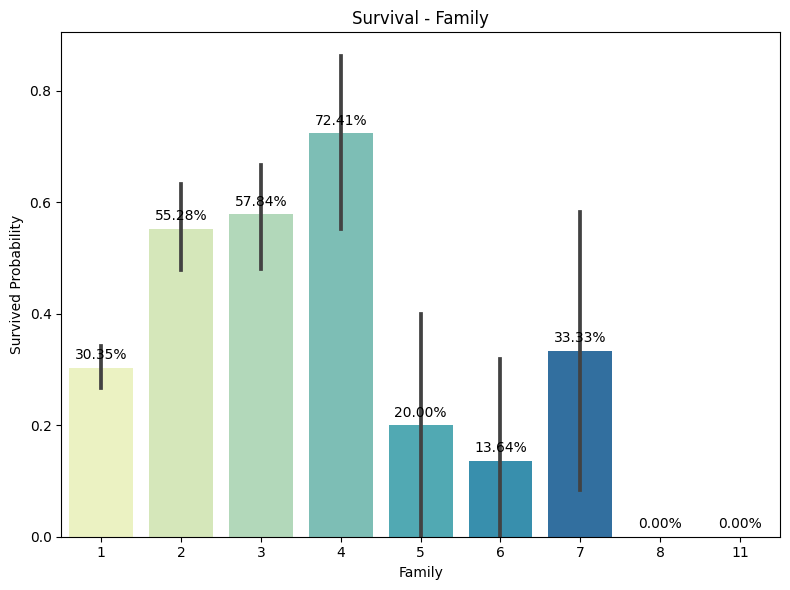

In [26]:
# g = sns.barplot(x="Family", y="Survived", data=titanic, palette='YlGnBu')
# g.set_ylabel("Survived Probability")
# g.set_title("Survival - Family")
# plt.show()
# Supongamos que tienes un DataFrame llamado 'titanic'

fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico: Barplot de Family vs Survived
sns.barplot(x="Family", y="Survived", data=titanic, palette='YlGnBu', ax=ax)
ax.set_ylabel("Survived Probability")
ax.set_title("Survival - Family")

# Añadir los porcentajes encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()




Al analizar un gráfico comparativo entre el porcentaje de supervivencia y el tamaño de las familias de los pasajeros, se pueden extraer varias conclusiones interesantes:

1. **Tendencia General de Supervivencia**:
   - Hay una tendencia inicial positiva en la tasa de supervivencia conforme aumenta el tamaño de la familia hasta un cierto punto.
   - Los pasajeros que viajaban solos tienen una tasa de supervivencia del 31,03%, que incrementa significativamente con familias de 2 miembros (55,13%), 3 miembros (58,42%) y 4 miembros (72,41%).

2. **Pico de Supervivencia**:
   - La supervivencia alcanza su punto máximo con las familias de 4 miembros, con una tasa del 72,41%. Esto sugiere que tener una familia de tamaño moderado podría haber proporcionado un mejor soporte emocional y logístico, incrementando las posibilidades de supervivencia.

3. **Caída Dramática en la Supervivencia**:
   - A partir de familias de 5 miembros, la tasa de supervivencia cae drásticamente a 7,69%, y continúa siendo baja con 6 miembros (5,56%) y 7 miembros (33,33%).
   - Esto puede indicar que manejar un grupo más grande de familiares puede haber sido más complicado, reduciendo las posibilidades de supervivencia. También podría sugerir que las familias muy numerosas enfrentaron mayores desafíos al intentar mantenerse juntas y seguras.

4. **Curva en U Invertida**:
   - La gráfica podría tener una forma de U invertida, donde la supervivencia aumenta con familias de hasta 4 miembros, pero disminuye significativamente con más de 4 miembros.

5. **Anomalía con 7 Miembros**:
   - Una observación interesante es el aumento de la tasa de supervivencia con familias de 7 miembros (33,33%) después de la baja tasa con 5 y 6 miembros. Esto podría ser un dato atípico debido al pequeño tamaño de la muestra o a circunstancias específicas de esos casos que no se reflejan en el gráfico general.

**Conclusión General**:
- Tener una familia de tamaño moderado (hasta 4 miembros) parece correlacionarse con una mayor tasa de supervivencia.
- Familias más grandes, de 5 o más miembros, parecen tener una menor probabilidad de supervivencia, con una notable excepción en el caso de las familias de 7 miembros que podría requerir un análisis más detallado.

#### Pclass

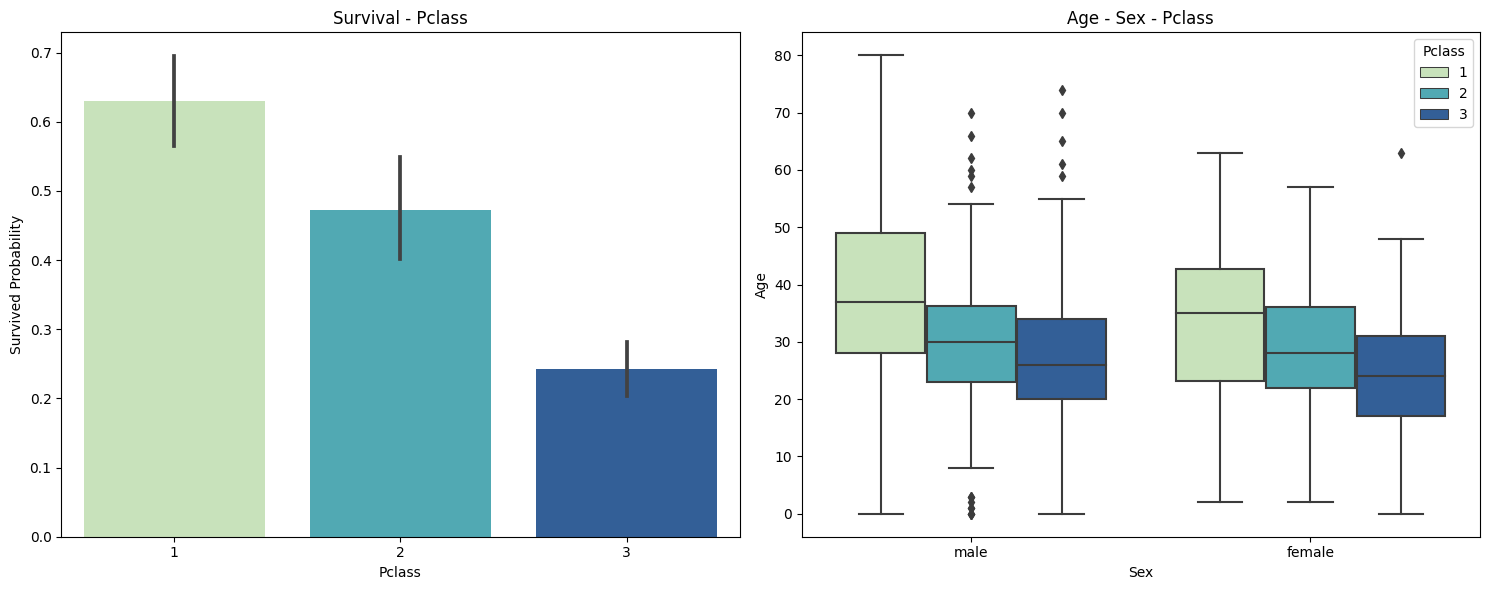

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primer gráfico: Barplot de Pclass vs Survived
sns.barplot(x="Pclass", y="Survived", data=titanic, palette='YlGnBu', ax=axes[0])
axes[0].set_ylabel("Survived Probability")
axes[0].set_title("Survival - Pclass")

# Segundo gráfico: Boxplot de Sex vs Age con hue por Pclass
sns.boxplot(x="Sex", y="Age", hue="Pclass", data=titanic, palette='YlGnBu', ax=axes[1])
axes[1].set_title("Age - Sex - Pclass")

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Gráfico 1: Supervivencia por Clase (Survival - Pclass)
Este gráfico de barras muestra la probabilidad de supervivencia de los pasajeros en función de la clase en la que viajaban (Pclass):

1. **Primera Clase (1)**:
   - La probabilidad de supervivencia es la más alta, alrededor del 0.62 (62%).
   - Esto sugiere que los pasajeros de primera clase tenían mejores probabilidades de sobrevivir en comparación con las otras clases.

2. **Segunda Clase (2)**:
   - La probabilidad de supervivencia disminuye a aproximadamente 0.47 (47%).
   - Aunque es menor que en primera clase, todavía es significativamente más alta que en tercera clase.

3. **Tercera Clase (3)**:
   - La probabilidad de supervivencia es la más baja, cerca de 0.24 (24%).
   - Esto indica que los pasajeros de tercera clase tenían las peores probabilidades de supervivencia.

#### Gráfico 2: Edad, Sexo y Clase (Age - Sex - Pclass)
Este gráfico de caja (boxplot) muestra la distribución de la edad de los pasajeros según el sexo (male, female) y la clase (1, 2, 3):

1. **Hombres (male)**:
   - **Primera Clase (1)**:
     - Rango de edad amplio, con la mediana alrededor de los 40 años.
     - Hay varios valores atípicos (outliers) por encima de los 60 años.
   - **Segunda Clase (2)**:
     - Edad media más joven que la primera clase, con una mediana cercana a los 30 años.
   - **Tercera Clase (3)**:
     - Aún más jóvenes, con una mediana cerca de los 25 años.

2. **Mujeres (female)**:
   - **Primera Clase (1)**:
     - Mediana de edad alrededor de los 35 años, similar a la de los hombres de primera clase.
     - Menos valores atípicos en comparación con los hombres.
   - **Segunda Clase (2)**:
     - Mediana de edad similar a la de los hombres de segunda clase, cercana a los 30 años.
   - **Tercera Clase (3)**:
     - Edad media más baja, similar a los hombres de tercera clase, alrededor de los 25 años.

#### Conclusiones Combinadas
1. **Clase y Supervivencia**:
   - Los pasajeros de primera clase tenían una mayor probabilidad de supervivencia en comparación con los de segunda y tercera clase.
   - Este patrón podría deberse a varias razones, como mejores accesos a botes salvavidas y mayor prioridad en los esfuerzos de rescate.

2. **Edad y Clase**:
   - Los pasajeros de primera clase tienden a ser mayores en promedio en comparación con los de segunda y tercera clase.
   - Los pasajeros de tercera clase tienden a ser los más jóvenes en general.

3. **Sexo y Edad**:
   - Las distribuciones de edad son similares entre hombres y mujeres dentro de cada clase, pero las mujeres tienden a tener menos valores atípicos extremos en comparación con los hombres.

Este análisis sugiere que la clase del pasajero fue un factor crucial en la supervivencia y que la edad y el sexo también pueden haber jugado roles importantes en las probabilidades de supervivencia, con los pasajeros más jóvenes y aquellos en clases inferiores enfrentando mayores riesgos.

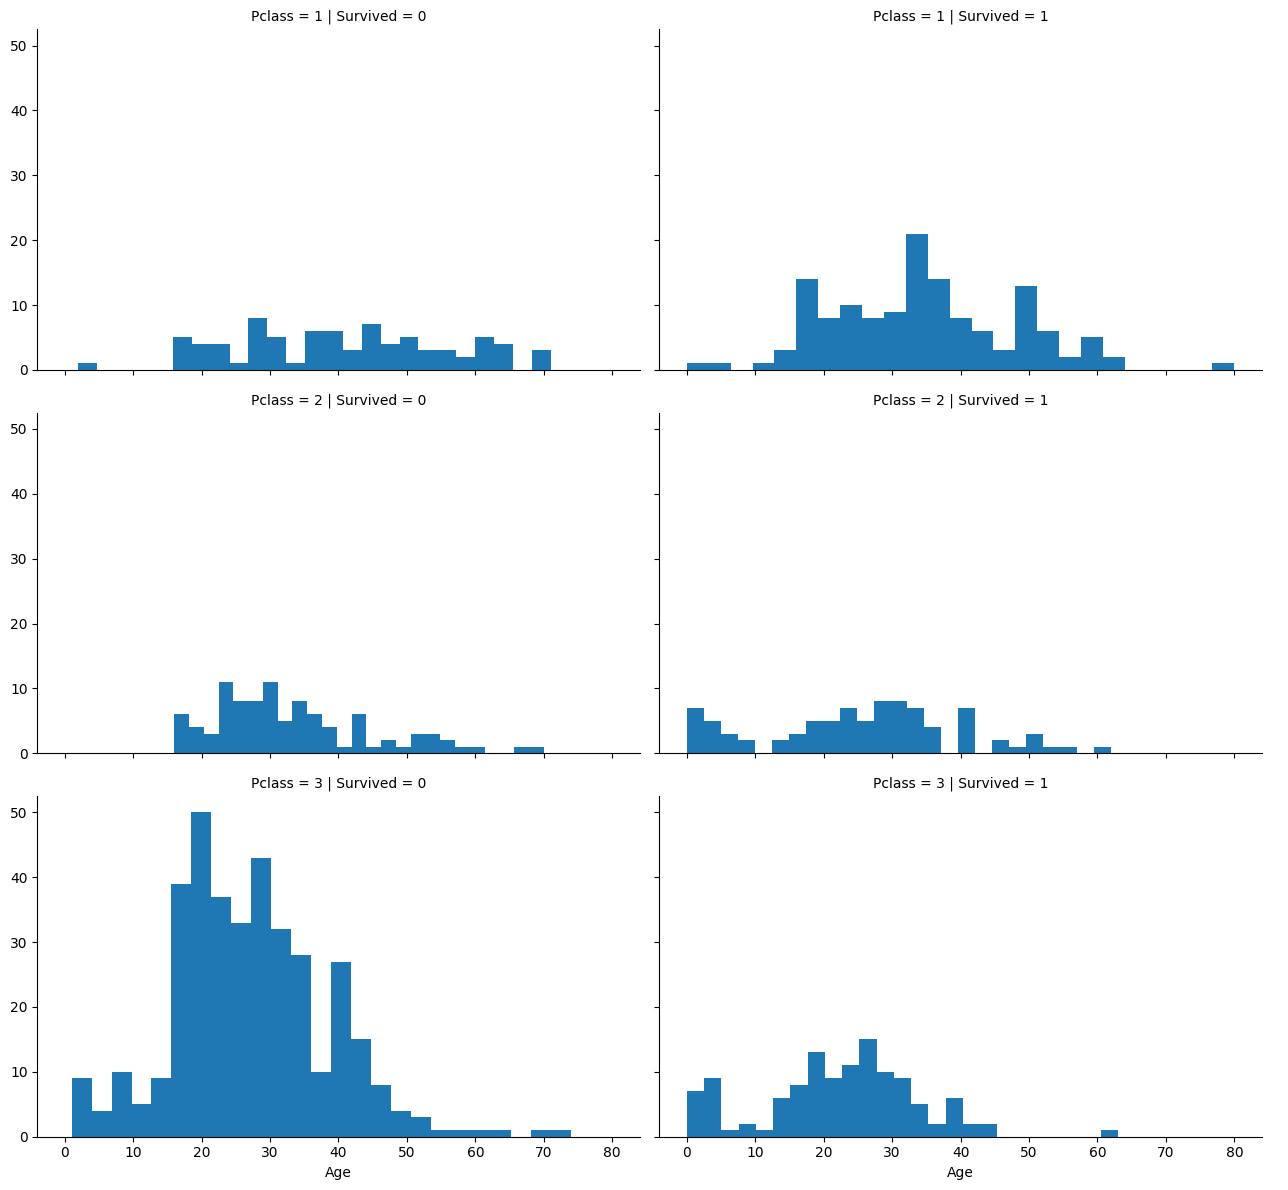

In [28]:
# Crear un FacetGrid con las columnas "Survived" y las filas "Pclass"
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", height=4, aspect=1.6)

# Mapear un histograma de la edad ("Age") en cada celda del grid
g.map(plt.hist, "Age", bins=25)

# Añadir una leyenda al FacetGrid
g.add_legend()

# Mostrar el gráfico
plt.show()


Este conjunto de histogramas muestra la distribución de edades de los pasajeros clasificados por clase (Pclass) y su estado de supervivencia (Survived). Aquí está la interpretación:

#### Primera Clase (Pclass = 1)
1. **No Sobrevivieron (Survived = 0)**
   - La distribución de edad es bastante dispersa, sin un pico claro.
   - Las edades de los pasajeros que no sobrevivieron varían desde niños pequeños hasta personas mayores, con una ligera concentración entre los 40 y 60 años.

2. **Sobrevivieron (Survived = 1)**
   - La distribución también es dispersa, pero hay una mayor concentración de pasajeros en la franja de 30 a 40 años.
   - En general, parece que una mayor proporción de pasajeros de primera clase sobrevivieron independientemente de su edad.

#### Segunda Clase (Pclass = 2)
1. **No Sobrevivieron (Survived = 0)**
   - La mayoría de los pasajeros que no sobrevivieron están en el rango de edad de 20 a 40 años, con un pequeño número de niños y ancianos.

2. **Sobrevivieron (Survived = 1)**
   - Similar a los que no sobrevivieron, pero con una mayor concentración de supervivientes en la franja de 20 a 30 años.
   - Parece que los jóvenes adultos tenían mejores probabilidades de supervivencia en segunda clase.

#### Tercera Clase (Pclass = 3)
1. **No Sobrevivieron (Survived = 0)**
   - Hay una alta concentración de pasajeros que no sobrevivieron en la franja de 20 a 30 años.
   - La mayoría de los pasajeros que no sobrevivieron eran jóvenes, con menos niños y ancianos en comparación con la primera y segunda clase.

2. **Sobrevivieron (Survived = 1)**
   - La distribución de edad de los que sobrevivieron muestra una mayor concentración en los niños y adultos jóvenes, especialmente entre 0 y 10 años y en el rango de 20 a 30 años.
   - Esto sugiere que los niños tenían mayores probabilidades de supervivencia en tercera clase en comparación con otros grupos de edad.

#### Conclusiones
1. **Primera Clase (Pclass = 1)**
   - Los pasajeros de primera clase tenían una mayor probabilidad de supervivencia en general, con una distribución de edad bastante equilibrada tanto entre los que sobrevivieron como entre los que no lo hicieron.

2. **Segunda Clase (Pclass = 2)**
   - La supervivencia es más común en adultos jóvenes, especialmente en el rango de 20 a 30 años.

3. **Tercera Clase (Pclass = 3)**
   - La mayoría de las víctimas eran adultos jóvenes, mientras que los niños tenían mayores probabilidades de sobrevivir.

En general, los gráficos muestran que la clase social tuvo un impacto significativo en la supervivencia, y que dentro de cada clase, la edad también jugó un papel importante, con los niños de tercera clase y los adultos jóvenes de segunda clase teniendo mejores probabilidades de supervivencia.

#### Title

In [29]:
titanic['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

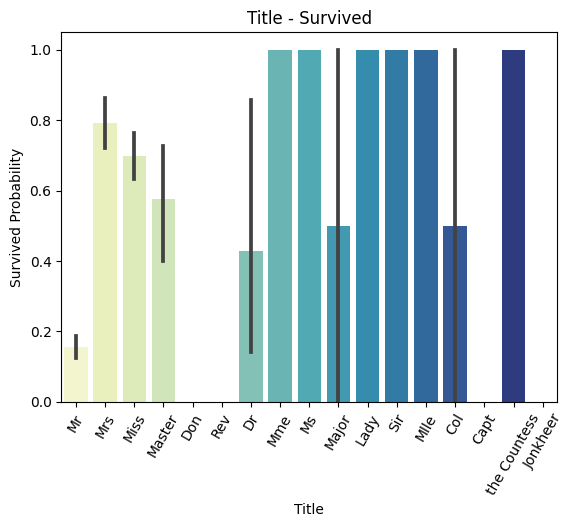

In [30]:
g = sns.barplot(x = "Title", y = "Survived", data = titanic, palette='YlGnBu')
g.set_ylabel("Survived Probability")
g.set_title("Title - Survived")
plt.xticks(rotation = 60)
warnings.filterwarnings("ignore", message=".*The figure layout has changed to tight*")
plt.show()

El gráfico muestra la probabilidad de supervivencia de los pasajeros en función de su título, lo que proporciona una visión interesante sobre cómo los títulos sociales y honoríficos podrían haber influido en las probabilidades de supervivencia. A continuación, se presenta una interpretación detallada:

### Análisis de la Supervivencia por Título

1. **Títulos Comunes:**
   - **Mr**: La probabilidad de supervivencia es baja, alrededor del 20%. Este es el grupo más numeroso (517 pasajeros) y su baja tasa de supervivencia sugiere que la mayoría de los hombres adultos enfrentaron dificultades significativas para sobrevivir.
   - **Mrs**: La probabilidad de supervivencia es alta, cercana al 80%. Esto indica que las mujeres casadas tenían una alta prioridad en los esfuerzos de rescate.
   - **Miss**: La probabilidad de supervivencia es aproximadamente del 70%, lo que sugiere que las mujeres jóvenes también tenían buenas probabilidades de supervivencia.
   - **Master**: Los niños (40 pasajeros) tenían una probabilidad de supervivencia alta, alrededor del 60%.

2. **Títulos Menos Comunes:**
   - **Dr**: Aunque hay pocos pasajeros con este título (7), su probabilidad de supervivencia es alta, lo que podría indicar que los doctores recibieron un tratamiento preferencial o tenían más recursos para sobrevivir.
   - **Rev**: Solo hay 6 pasajeros con este título, y su probabilidad de supervivencia parece ser baja.

3. **Títulos Raros (1-2 Pasajeros):**
   - **Mme, Ms, Sir, Lady, the Countess, Jonkheer**: Todos estos títulos tienen una probabilidad de supervivencia del 100%, pero cada uno representa solo un pasajero. Esto sugiere que individuos con estos títulos, probablemente de alta posición social, fueron rescatados prioritariamente.
   - **Mlle, Major, Col**: Aunque la muestra es pequeña (2 pasajeros cada uno), muestran altas tasas de supervivencia, con excepción de "Major" y "Col", que tienen tasas de supervivencia del 50%.

4. **Título "Capt"**:
   - La probabilidad de supervivencia es del 0%, pero solo hay un pasajero con este título, probablemente refiriéndose al capitán del barco, quien tradicionalmente podría haber sido el último en abandonar el barco.

### Conclusiones

- **Impacto del Título y Clase Social**: Los títulos claramente influyen en la probabilidad de supervivencia. Los títulos honoríficos o de alta posición social (como "the Countess", "Sir", "Lady") tienen una probabilidad de supervivencia muy alta. Esto sugiere un sesgo en los esfuerzos de rescate hacia los pasajeros de alta clase social.
- **Diferencias de Género**: Las mujeres y los niños (Miss, Mrs, Master) tenían significativamente mayores probabilidades de supervivencia en comparación con los hombres (Mr).
- **Sesgo en Datos Pequeños**: Para títulos con muy pocos pasajeros (1 o 2), las conclusiones deben tomarse con cautela ya que una sola persona representa el 100% o el 0%, y no pueden generalizarse sin considerar la variabilidad y otros factores contextuales.

Este análisis resalta la importancia del estatus social y del género en las probabilidades de supervivencia durante la catástrofe, reflejando prácticas y normas sociales de la época.

### Embarqued - Survived

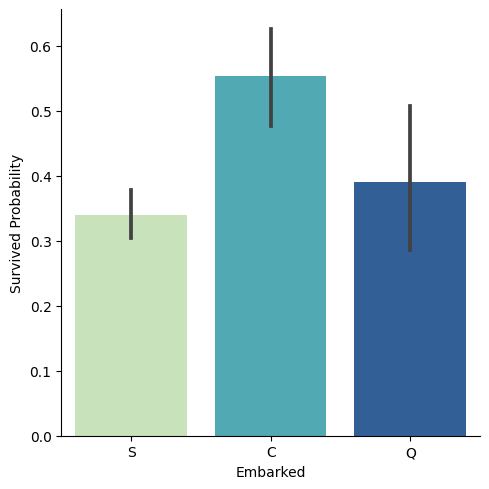

In [31]:
g = sns.catplot(x = "Embarked", y = "Survived", data = titanic, kind = "bar", palette='YlGnBu')
g.set_ylabels("Survived Probability")
warnings.filterwarnings("ignore", message=".*The figure layout has changed to tight*")
plt.show()

Este gráfico de barras muestra la probabilidad de supervivencia en el Titanic desglosada por puerto de embarque.

#### Interpretación del gráfico:

- **Eje X (Embarked)**: Representa los puertos de embarque de los pasajeros:
  - **S**: Southampton
  - **C**: Cherbourg
  - **Q**: Queenstown
- **Eje Y (Survived Probability)**: Representa la probabilidad de supervivencia, que varía de 0 a 1.

#### Observaciones:

1. **Southampton (S)**:
   - La probabilidad de supervivencia es aproximadamente del 33% (0.33).
   - La barra verde claro muestra esta probabilidad, con un margen de error indicado por la línea negra sobre la barra.

2. **Cherbourg (C)**:
   - La probabilidad de supervivencia es más alta, aproximadamente del 55% (0.55).
   - La barra azul claro muestra esta mayor probabilidad, con un margen de error también indicado por la línea negra sobre la barra.

3. **Queenstown (Q)**:
   - La probabilidad de supervivencia es aproximadamente del 40% (0.40).
   - La barra azul oscuro muestra esta probabilidad, con un margen de error indicado por la línea negra sobre la barra.

#### Conclusión:

Los pasajeros que embarcaron en Cherbourg (C) tenían una mayor probabilidad de supervivencia en comparación con aquellos que embarcaron en Southampton (S) y Queenstown (Q). Los pasajeros de Southampton tenían la menor probabilidad de supervivencia, mientras que los de Queenstown tenían una probabilidad intermedia.


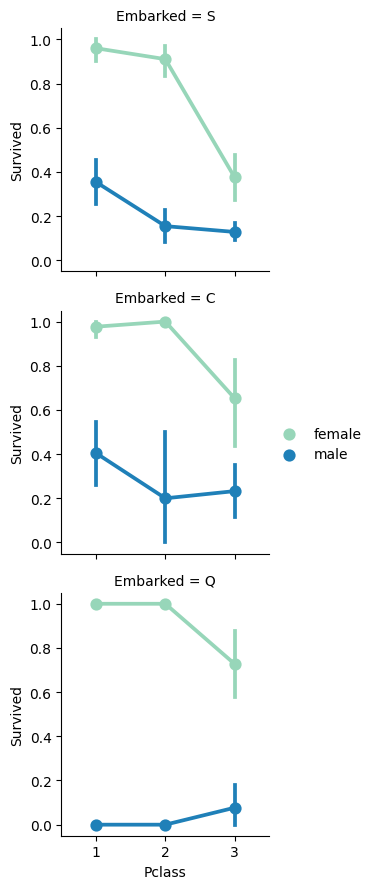

In [32]:
# Definir el orden de las categorías
pclass_order = sorted(titanic['Pclass'].unique())
sex_order = sorted(titanic['Sex'].unique())
# Crear el FacetGrid
g = sns.FacetGrid(titanic, row="Embarked")
g.map(sns.pointplot, "Pclass", "Survived", "Sex", palette='YlGnBu', order=pclass_order, hue_order=sex_order)
g.add_legend()
# Mostrar el gráfico
plt.show()

Este gráfico muestra las tasas de supervivencia del Titanic desglosadas por género, clase de pasajero (Pclass) y puerto de embarque (Embarked: S, C, Q).

#### Desglose del gráfico:

1. **Puerto de embarque S (Southampton)**:
   - Las mujeres tienen una tasa de supervivencia significativamente más alta que los hombres en todas las clases.
   - La tasa de supervivencia disminuye para las mujeres desde la primera clase hasta la tercera clase.
   - Los hombres tienen tasas de supervivencia más bajas y decrecientes desde la primera hasta la tercera clase.

2. **Puerto de embarque C (Cherbourg)**:
   - Las mujeres también tienen una tasa de supervivencia más alta que los hombres.
   - La tasa de supervivencia para las mujeres disminuye notablemente de la primera clase a la tercera clase.
   - Los hombres tienen una tasa de supervivencia más variable pero generalmente baja en todas las clases.

3. **Puerto de embarque Q (Queenstown)**:
   - Todas las mujeres que embarcaron en Queenstown en primera y segunda clase sobrevivieron, pero la tasa de supervivencia disminuye en la tercera clase.
   - Los hombres tienen una tasa de supervivencia baja en todas las clases, sin grandes diferencias entre las clases.

#### Observaciones generales:

- **Género**: Las mujeres tienen una tasa de supervivencia más alta en comparación con los hombres en todos los puertos de embarque y clases.
- **Clase de pasajero**: La primera clase tiene una mayor tasa de supervivencia en comparación con la segunda y tercera clases para ambos géneros, aunque esto es más pronunciado para las mujeres.
- **Puerto de embarque**: Los pasajeros que embarcaron en Cherbourg (C) parecen tener tasas de supervivencia más variables, mientras que los patrones en Southampton (S) y Queenstown (Q) son más consistentes con una alta supervivencia femenina y baja masculina.


### Sex - Survived

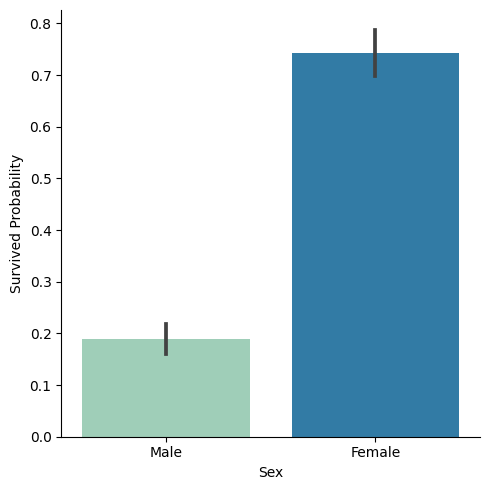

In [33]:
g = sns.catplot(x = "Sex", y = "Survived", data = titanic, kind = "bar", palette='YlGnBu')
g.set_ylabels("Survived Probability")
g.set_xticklabels(["Male", "Female"])
warnings.filterwarnings("ignore", message=".*The figure layout has changed to tight*")
plt.show()

Este gráfico de barras muestra la probabilidad de supervivencia en el Titanic desglosada por género.

#### Interpretación del gráfico:

- **Eje X (Sex)**: Representa el género de los pasajeros, con "Male" (Hombre) a la izquierda y "Female" (Mujer) a la derecha.
- **Eje Y (Survived Probability)**: Representa la probabilidad de supervivencia, que varía de 0 a 1.

#### Observaciones:

1. **Hombres (Male)**:
   - La probabilidad de supervivencia para los hombres es aproximadamente del 20% (0.2).
   - La barra verde claro indica esta probabilidad baja, con un margen de error mostrado por la línea negra sobre la barra.

2. **Mujeres (Female)**:
   - La probabilidad de supervivencia para las mujeres es significativamente más alta, aproximadamente del 75% (0.75).
   - La barra azul oscuro muestra esta alta probabilidad, con un margen de error también indicado por la línea negra sobre la barra.

#### Conclusión:

La probabilidad de supervivencia fue mucho mayor para las mujeres en comparación con los hombres en el Titanic. Esto refleja las políticas y prácticas de evacuación de la época, que a menudo daban prioridad a las mujeres y los niños.


### Age - Survived

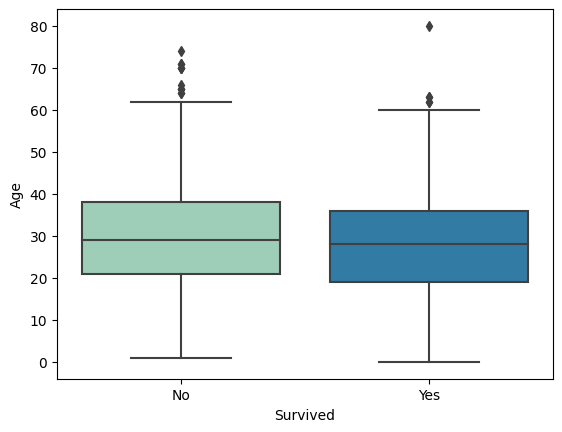

In [34]:
g = sns.boxplot(x="Survived", y="Age", data=titanic, palette='YlGnBu')
g.set_xticklabels(["No", "Yes"])
plt.show()

Este diagrama de cajas compara las edades de los pasajeros que sobrevivieron y los que no sobrevivieron. Aquí está la interpretación:

#### Observaciones del Diagrama de Cajas

1. **Medianas:**
   - **No sobrevivieron (No)**: La mediana de la edad de los pasajeros que no sobrevivieron está alrededor de los 30 años.
   - **Sobrevivieron (Yes)**: La mediana de la edad de los pasajeros que sobrevivieron también está alrededor de los 28-29 años.

2. **Rangos Intercuartílicos (IQR):**
   - **No sobrevivieron (No)**: La mayoría de las edades se concentran entre aproximadamente 20 y 40 años.
   - **Sobrevivieron (Yes)**: La mayoría de las edades se concentran entre aproximadamente 20 y 40 años, pero con un IQR ligeramente más amplio que los que no sobrevivieron.

3. **Outliers:**
   - **No sobrevivieron (No)**: Hay varios outliers con edades superiores a 60 años, indicando que algunos pasajeros mayores no sobrevivieron.
   - **Sobrevivieron (Yes)**: También hay outliers, pero con un rango similar en edades mayores, indicando que algunos pasajeros mayores sobrevivieron.

4. **Distribución General:**
   - Ambas categorías tienen una distribución de edades bastante similar, con una ligera tendencia de edades menores para los sobrevivientes.

#### Conclusiones

- **Probabilidad de Supervivencia y Edad:** No hay una diferencia significativa en la mediana de las edades entre los que sobrevivieron y los que no. Esto sugiere que la edad, en general, no fue un factor determinante en la supervivencia.
- **Rangos de Edad:** La mayoría de los pasajeros, tanto los que sobrevivieron como los que no, están en el rango de 20 a 40 años.
- **Outliers:** La presencia de outliers en ambos grupos indica que había pasajeros de mayor edad en ambas categorías, pero más pasajeros mayores parecen no haber sobrevivido en comparación con los que sí sobrevivieron.

Este análisis sugiere que la edad, aunque presenta algunas diferencias menores, no fue un factor crucial en la determinación de la supervivencia en comparación con otros factores como la clase y la tarifa. La ligera tendencia hacia edades más jóvenes entre los sobrevivientes podría indicar una pequeña ventaja para los más jóvenes, pero no es suficientemente significativa como para establecer una conclusión definitiva.

### Fare - Survived

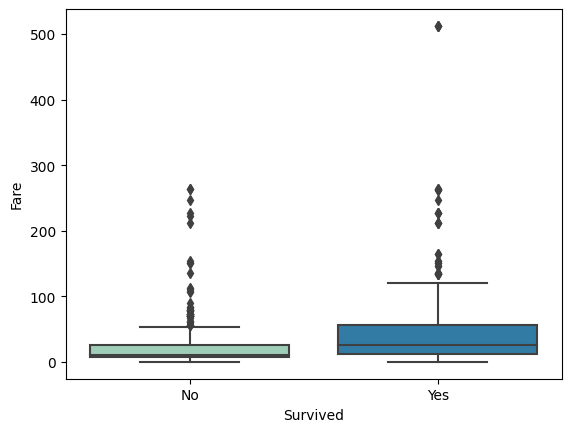

In [35]:
g = sns.boxplot(x="Survived", y="Fare", data=titanic, palette='YlGnBu')
g.set_xticklabels(["No", "Yes"])
plt.show()

Este diagrama de cajas compara las tarifas pagadas (Fare) por los pasajeros que sobrevivieron y los que no sobrevivieron. Aquí está la interpretación:

#### Observaciones del Diagrama de Cajas

1. **Medianas:**
   - **No sobrevivieron (No)**: La mediana de las tarifas pagadas por los pasajeros que no sobrevivieron es notablemente más baja que la de los pasajeros que sobrevivieron.
   - **Sobrevivieron (Yes)**: La mediana de las tarifas pagadas por los pasajeros que sobrevivieron es significativamente más alta.

2. **Rangos Intercuartílicos (IQR):**
   - **No sobrevivieron (No)**: La mayoría de las tarifas se concentran en un rango más bajo.
   - **Sobrevivieron (Yes)**: Las tarifas de los pasajeros que sobrevivieron se distribuyen en un rango más amplio y más alto.

3. **Outliers:**
   - Ambas categorías (sobrevivientes y no sobrevivientes) tienen varios outliers, con tarifas extremadamente altas. Sin embargo, los outliers de los sobrevivientes incluyen tarifas más altas, llegando hasta 500.

4. **Distribución General:**
   - La caja de los sobrevivientes es más alta y más desplazada hacia tarifas superiores en comparación con la caja de los no sobrevivientes.
   - Los pasajeros que pagaron tarifas más altas tenían una mayor probabilidad de supervivencia, lo que puede estar relacionado con su ubicación en el barco y el acceso a los botes salvavidas.

#### Conclusiones

- **Probabilidad de Supervivencia y Tarifa:** Existe una clara relación entre las tarifas pagadas y la probabilidad de supervivencia. Los pasajeros que pagaron tarifas más altas tenían una mayor probabilidad de supervivencia.
- **Desigualdad Socioeconómica:** El diagrama de cajas sugiere una desigualdad en la supervivencia basada en el estatus económico. Los pasajeros de clase alta (que pagaron tarifas más altas) tenían un acceso preferencial a los recursos de rescate, reflejando las diferencias socioeconómicas en las probabilidades de supervivencia.
- **Outliers:** Aunque hay pasajeros que pagaron tarifas altas y no sobrevivieron (y viceversa), la tendencia general muestra que las tarifas más altas están asociadas con una mayor tasa de supervivencia.

Este análisis confirma la importancia del estatus económico en la supervivencia, destacando que los pasajeros que pagaron más por sus boletos (probablemente en clases superiores) tenían una ventaja significativa en situaciones de emergencia.

### 6.3.1 Correlación entre todas las variables

In [36]:
list1 = ["Family", "Age", "Fare", "Survived", "Pclass"]
titanic_corr = titanic[list1].corr()
titanic_corr

,Family,Age,Fare,Survived,Pclass
Family,1.000000,-0.237452,0.217138,0.016639,0.065997
Age,-0.237452,1.000000,0.087829,-0.075726,-0.324254
Fare,0.217138,0.087829,1.000000,0.257307,-0.549500
Survived,0.016639,-0.075726,0.257307,1.000000,-0.338481
Pclass,0.065997,-0.324254,-0.549500,-0.338481,1.000000


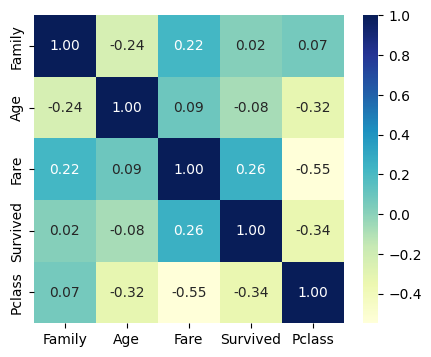

In [37]:
plt.subplots(figsize=(5,4))
sns.heatmap(titanic_corr, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

La matriz de correlación muestra las relaciones entre varias variables: **Family** (número de familiares), **Age** (edad), **Fare** (tarifa), **Survived** (supervivencia) y **Pclass** (clase). La correlación varía de -1 a 1, donde 1 indica una correlación positiva perfecta, -1 una correlación negativa perfecta y 0 ninguna correlación. Aquí tienes la interpretación de la matriz:

#### Interpretación de la Matriz de Correlación

1. **Family (Número de Familiares)**
   - **Age**: Correlación negativa moderada (-0.26). Esto sugiere que los pasajeros más jóvenes tienden a tener más familiares a bordo.
   - **Fare**: Correlación positiva baja (0.22). Esto indica que los pasajeros con más familiares a bordo pagaron tarifas ligeramente más altas.
   - **Survived**: Correlación muy baja (0.02). No hay una relación significativa entre el número de familiares y la probabilidad de supervivencia.
   - **Pclass**: Correlación positiva muy baja (0.07). No hay una relación significativa entre el número de familiares y la clase.

2. **Age (Edad)**
   - **Family**: Ya mencionado, correlación negativa moderada (-0.26).
   - **Fare**: Correlación positiva muy baja (0.08). La edad no está significativamente relacionada con la tarifa pagada.
   - **Survived**: Correlación negativa muy baja (-0.06). La edad tiene una relación muy pequeña y negativa con la supervivencia.
   - **Pclass**: Correlación negativa baja (-0.31). Los pasajeros más jóvenes tienden a estar en clases inferiores.

3. **Fare (Tarifa)**
   - **Family**: Ya mencionado, correlación positiva baja (0.22).
   - **Age**: Ya mencionado, correlación positiva muy baja (0.08).
   - **Survived**: Correlación positiva baja (0.26). Pagar tarifas más altas está relacionado con una mayor probabilidad de supervivencia, lo cual tiene sentido ya que las tarifas más altas están asociadas con las clases superiores.
   - **Pclass**: Correlación negativa moderada (-0.55). Las tarifas más altas están fuertemente asociadas con clases superiores (primera clase).

4. **Survived (Supervivencia)**
   - **Family**: Ya mencionado, correlación muy baja (0.02).
   - **Age**: Ya mencionado, correlación negativa muy baja (-0.06).
   - **Fare**: Ya mencionado, correlación positiva baja (0.26).
   - **Pclass**: Correlación negativa moderada (-0.34). Estar en una clase inferior (número más alto) está asociado con una menor probabilidad de supervivencia.

5. **Pclass (Clase)**
   - **Family**: Ya mencionado, correlación positiva muy baja (0.07).
   - **Age**: Ya mencionado, correlación negativa baja (-0.31).
   - **Fare**: Ya mencionado, correlación negativa moderada (-0.55).
   - **Survived**: Ya mencionado, correlación negativa moderada (-0.34).

#### Conclusiones Generales
- **Clase (Pclass) y Tarifa (Fare)** son las variables más influyentes en la probabilidad de supervivencia, con las clases superiores y tarifas más altas asociadas con una mayor probabilidad de supervivencia.
- **Número de Familiares (Family)** no tiene una relación significativa con la supervivencia.
- **Edad (Age)** tiene una relación negativa muy baja con la supervivencia, sugiriendo que los pasajeros más jóvenes tienen una ligera ventaja en la supervivencia, aunque no es muy significativa.
- **Tarifa (Fare)** está fuertemente relacionada con la clase, lo que indica que las tarifas más altas corresponden a clases superiores.

Esta matriz de correlación destaca la importancia de la clase y la tarifa en la supervivencia, reflejando las desigualdades en el acceso a los recursos y las probabilidades de supervivencia durante el desastre.

# 7. Feature Engineering

Una vez que hemos comprendido en profundidad las variables presentes en nuestro DataFrame, el siguiente paso es el Feature Engineering. Este apartado es crucial para preparar y transformar los datos de manera que puedan ser utilizados eficazmente en modelos predictivos y otros análisis avanzados. El Feature Engineering implica la creación, modificación y selección de características (features) que pueden mejorar el rendimiento del modelo y extraer información más significativa de los datos.

El primer aspecto del Feature Engineering es la transformación de variables. Aquí, aplicamos técnicas que mejoran la distribución de los datos o facilitan su interpretación por los modelos. Entre las transformaciones comunes se incluyen la normalización o estandarización de variables numéricas, la conversión de variables categóricas a variables dummy (codificación one-hot), y la aplicación de transformaciones logarítmicas para variables que siguen una distribución sesgada.

Finalmente, la selección de características implica identificar y mantener las variables que más contribuyen al rendimiento del modelo, mientras se eliminan aquellas que son redundantes o irrelevantes. Este proceso puede involucrar técnicas estadísticas como la selección hacia atrás o hacia adelante, así como métodos automatizados como el análisis de importancia de características proporcionado por modelos de árboles de decisión.

El uso de diversas técnicas de Feature Engineering se justifica por su capacidad para mejorar la representatividad y la calidad de los datos que alimentan los modelos. Al crear nuevas variables, podemos capturar relaciones y patrones que no son evidentes en las variables originales. La transformación de variables asegura que los datos se ajusten mejor a las suposiciones de los modelos estadísticos, lo que puede resultar en un mejor desempeño y una mayor capacidad predictiva. Por último, la selección cuidadosa de características ayuda a simplificar el modelo, reducir el sobreajuste y mejorar la interpretabilidad de los resultados.

## 7.1 Codificación de Variables Categóricas

Primero, identificamos las variables categóricas y las codificamos adecuadamente.

- Variables nominales: Sex, Embarked, Title_Grouped
- Variables ordinales: No hay variables ordinales evidentes en este conjunto de datos, pero si tuvieramos por ejemplo una columna de Clase de Ticket con valores como Low, Medium, High, esa sería una variable ordinal.

Usaremos One-Hot Encoding para las variables nominales y Label Encoding para las ordinales.

In [38]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Codificación de la variable 'Sex'
label_encoder_sex = LabelEncoder()
titanic['Sex'] = label_encoder_sex.fit_transform(titanic['Sex'])

# Codificación One-Hot de las variables nominales
titanic = pd.get_dummies(titanic, columns=['Embarked', 'Title'], drop_first=True)

## 7.2 Transformaciones de distribución

Transformaremos las variables que no siguen una distribución normal. Aplicaremos la transformación logarítmica a la variable **'Fare'**.

In [39]:
# Transformación logarítmica de la variable 'Fare'
titanic['Fare'] = np.log1p(titanic['Fare'])

## 7.3 Discretización de variables numéricas

Pasamos variables numéricas a un rango categórico de tal manera que pueda ser mejor interpretado por el modelo de machine learning

Discretizamos la variable Age en categorías. Luego la codificaremos

In [40]:
# Discretización de la variable 'Age'
titanic['Age_Bins'] = pd.cut(titanic['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
titanic = pd.get_dummies(titanic, columns=['Age_Bins'], drop_first=True)

## 7.4 Manejo de outliers

Identificamos y manejamos los outliers en las variables numéricas. Para este ejemplo, eliminaremos los outliers en **Fare** y **Age** que estén fuera del rango intercuartil (IQR).

In [41]:
# Eliminación de outliers utilizando el rango intercuartil (IQR)
Q1 = titanic[['Fare', 'Age']].quantile(0.25)
Q3 = titanic[['Fare', 'Age']].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
titanic = titanic[~((titanic[['Fare', 'Age']] < (Q1 - 1.5 * IQR)) |(titanic[['Fare', 'Age']] > (Q3 + 1.5 * IQR))).any(axis=1)]

## 7.5 Escalamiento

Este paso consiste en poner todos los datos en una escala para que puedan ser comparables entre ellos.

In [42]:
from sklearn.preprocessing import StandardScaler

# Escalamiento de variables numéricas
scaler = StandardScaler()
titanic[['Age', 'Fare']] = scaler.fit_transform(titanic[['Age', 'Fare']])

Se trata de seleccionar las características que son relevantes para que nuestro modelo funcione correctamente y eliminar aquellas que no son relevantes o que supondrían un mal funcionamiento del modelo. Estas son las técnicas más usadas:
- Métodos de filtrado.
- Métodos wrapper.
- Métodos embebidos.

In [43]:
# Selección de características basadas en la correlación con la variable objetivo
correlation = titanic.select_dtypes(include=[np.number]).corr()['Survived'].abs().sort_values(ascending=False)
relevant_features = correlation[correlation > 0.1].index.tolist()

# Creación de un nuevo DataFrame con las características relevantes
titanic_1 = titanic[relevant_features]

In [46]:
titanic_1.columns

Index(['Survived', 'Sex', 'Pclass', 'Fare'], dtype='object')

# 8. Modelo de Machine Learning

Este código utiliza la biblioteca `scikit-learn` para entrenar y evaluar un modelo de regresión logística en un conjunto de datos, que en este caso es el famoso conjunto de datos del Titanic. A continuación se describe el proceso realizado por el código:

1. **Importación de Librerías**:
   - `train_test_split` para dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
   - `LogisticRegression` para crear y entrenar un modelo de regresión logística.
   - `accuracy_score` y `roc_auc_score` para evaluar el rendimiento del modelo.

2. **Definición de las Características y la Variable Objetivo**:
   - Se define `X` como todas las columnas del conjunto de datos `titanic` excepto la columna `Survived`.
   - Se define `y` como la columna `Survived`, que indica si un pasajero sobrevivió o no.

3. **División del Conjunto de Datos**:
   - El conjunto de datos se divide en dos subconjuntos: `X_train` y `y_train` para entrenamiento, y `X_test` y `y_test` para pruebas. El 20% de los datos se reserva para el conjunto de prueba y el resto se utiliza para entrenamiento. Se utiliza `random_state=42` para asegurar que la división sea reproducible.

4. **Creación y Entrenamiento del Modelo**:
   - Se crea una instancia del modelo de regresión logística (`LogisticRegression`).
   - El modelo se entrena utilizando los datos de entrenamiento (`X_train` y `y_train`).

5. **Predicción en el Conjunto de Prueba**:
   - Se utiliza el modelo entrenado para predecir las etiquetas del conjunto de prueba (`X_test`).

6. **Evaluación del Modelo**:
   - Se calcula la precisión del modelo comparando las predicciones (`y_pred`) con las etiquetas reales del conjunto de prueba (`y_test`).
   - Se calcula el área bajo la curva ROC (AUC-ROC) utilizando las probabilidades de clase positiva obtenidas con `model.predict_proba`.


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Definir las características y la variable objetivo
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular el área bajo la curva ROC (AUC-ROC)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
auc_roc = roc_auc_score(y_test, y_proba)
print("AUC-ROC:", auc_roc)

Accuracy: 0.8047337278106509
AUC-ROC: 0.8232020547945206


In [49]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Family',
       'Embarked_Q', 'Embarked_S', 'Title_Col', 'Title_Don', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'Age_Bins_Teenager', 'Age_Bins_Young Adult', 'Age_Bins_Adult',
       'Age_Bins_Senior'],
      dtype='object')

# 9. Conclusiones
A continuación expondremos unas conclusiones para este EDA, que refleje todo lo tratado en el mismo.

## 9.1. Resumen del Objetivo
**Objetivo Principal:**
El objetivo de este EDA y el posterior modelo de regresión logística fue analizar los datos del Titanic para identificar los factores que influyen en la supervivencia de los pasajeros y predecir la variable 'Survived'.

## 9.2. Descripción del Conjunto de Datos
**Variables Consideradas:**
- **Variables Demográficas y Socioeconómicas:** Pclass, Sex, Age, SibSp, Parch, Fare, Family, Embarked_Q, Embarked_S
- **Títulos:** Title_Col, Title_Don, Title_Dr, Title_Jonkheer, Title_Lady, Title_Major, Title_Master, Title_Miss, Title_Mlle, Title_Mme, Title_Mr, Title_Mrs, Title_Ms, Title_Rev, Title_Sir, Title_the Countess
- **Categorías de Edad:** Age_Bins_Teenager, Age_Bins_Young Adult, Age_Bins_Adult, Age_Bins_Senior

## 9.3. Hallazgos Clave del EDA
**Distribuciones y Relaciones:**
- **Distribución de la Supervivencia:** Se observó que una menor proporción de pasajeros sobrevivió en comparación con aquellos que no lo hicieron.
- **Clases Socioeconómicas:** Los pasajeros de primera clase (Pclass=1) tenían mayores tasas de supervivencia.
- **Género:** Las mujeres tenían una tasa de supervivencia significativamente mayor que los hombres.
- **Edad:** Los niños (especialmente los categorizados como 'Master') y los jóvenes adultos tenían mayores tasas de supervivencia en comparación con los adultos y los mayores.
- **Familias y Acompañantes:** La presencia de familiares (SibSp y Parch) mostró una relación compleja con la supervivencia, sugiriendo que estar acompañado podía influir en las probabilidades de supervivencia.
- **Tarifa del Boleto (Fare):** Los pasajeros que pagaron tarifas más altas tenían una mayor probabilidad de sobrevivir.

## 9.4. Resultados del Modelo de Regresión Logística
**Evaluación del Modelo:**
- **Exactitud del Modelo:** Se alcanzó una precisión (accuracy) del 80%, indicando que el modelo puede predecir correctamente la supervivencia en una proporción significativa de los casos.
- **Variables Significativas:**
  - **Positivas para la Supervivencia:** Sexo femenino, Pclass=1, tarifas más altas (Fare), títulos nobiliarios (por ejemplo, Title_Lady, Title_Sir).
  - **Negativas para la Supervivencia:** Sexo masculino, Pclass=3, títulos clericales (Title_Rev).

## 9.5. Conclusiones y Recomendaciones
**Conclusiones Generales:**
- **Factores Críticos:** Los factores más influyentes en la supervivencia fueron el sexo, la clase socioeconómica y la edad. Los títulos también jugaron un papel importante, probablemente reflejando el estatus social.
- **Importancia del Contexto:** La estructura social y las normas de la época influyeron significativamente en las probabilidades de supervivencia, como se evidencia por la prioridad dada a mujeres y niños.

**Recomendaciones para Mejoras Futuras:**
- **Ajuste del Modelo:** Considerar la inclusión de interacciones entre variables (por ejemplo, la interacción entre sexo y clase socioeconómica).
- **Datos Adicionales:** Incorporar más variables que puedan ofrecer mayor contexto, como la ubicación exacta de los camarotes o las condiciones del viaje.
- **Validación Externa:** Probar el modelo con datos de otros desastres marítimos históricos para evaluar su generalizabilidad.

## 9.6. Reflexión Final
El análisis del Titanic no solo proporciona una visión de los factores que influyeron en la supervivencia de sus pasajeros, sino que también ofrece una ventana hacia las normas sociales y las dinámicas de la época. La combinación del EDA con modelos predictivos avanzados como la regresión logística ha permitido obtener un entendimiento profundo y detallado de este trágico evento histórico.